In [31]:
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt
import seaborn as sns

In [59]:
import warnings
warnings.filterwarnings("ignore")

In [60]:
df = pd.read_csv('train.csv',usecols=['Age','Fare','Survived'])

In [61]:
df.isnull().mean() * 100

Survived     0.00000
Age         19.86532
Fare         0.00000
dtype: float64

In [62]:
X = df.drop(columns=['Survived'])
y = df['Survived']

In [63]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [64]:
X_train.head()

,Age,Fare
30,40.0,27.7208
10,4.0,16.7000
873,47.0,9.0000
182,9.0,31.3875
876,20.0,9.8458


In [65]:
X_train['Age_imputed'] = X_train['Age']
X_test['Age_imputed'] = X_test['Age']

In [66]:
X_test.tail()

,Age,Fare,Age_imputed
89,24.0,8.0500,24.0
80,22.0,9.0000,22.0
846,NaN,69.5500,NaN
870,26.0,7.8958,26.0
251,29.0,10.4625,29.0


In [67]:
X_train['Age_imputed'][X_train['Age_imputed'].isnull()] = X_train['Age'].dropna().sample(X_train['Age'].isnull().sum()).values
X_test['Age_imputed'][X_test['Age_imputed'].isnull()] = X_train['Age'].dropna().sample(X_test['Age'].isnull().sum()).values



In [68]:
X_train['Age'].dropna().sample(X_train['Age'].isnull().sum()).values


array([35.  , 24.  , 18.  , 40.  , 61.  , 27.  ,  2.  , 21.  , 24.  ,
        8.  , 16.  , 13.  , 32.  , 59.  , 36.  , 36.  , 33.  , 49.  ,
        9.  , 43.  , 48.  , 18.  , 41.  , 36.  , 24.  , 34.  , 29.  ,
       58.  , 21.  , 36.  , 11.  , 49.  , 25.  , 21.  , 26.  , 22.  ,
       25.  , 44.  , 48.  , 66.  , 38.  , 26.  , 35.  , 36.  , 28.  ,
        4.  , 16.  , 21.  , 38.  , 36.5 ,  9.  ,  1.  , 22.  , 70.5 ,
       18.  , 27.  , 29.  ,  3.  ,  7.  , 46.  , 54.  , 30.  , 31.  ,
       27.  , 38.  , 29.  , 21.  , 30.  , 17.  , 30.  , 23.  , 16.  ,
       26.  , 52.  , 14.  , 30.  , 29.  , 36.  , 38.  , 23.  , 33.  ,
       40.  , 27.  , 19.  , 17.  , 60.  , 62.  , 46.  , 51.  , 44.  ,
       21.  ,  3.  , 24.  , 25.  , 34.  , 30.  , 65.  , 17.  , 30.  ,
        7.  , 30.  , 24.  ,  9.  , 50.  , 28.  , 25.  , 51.  , 35.  ,
       45.  , 31.  , 18.  , 24.  , 35.  , 21.  , 28.  , 25.  , 32.  ,
       36.  , 19.  , 36.  , 15.  , 14.5 , 28.  ,  9.  , 39.  , 39.  ,
       38.  , 16.  ,

In [69]:
X_train['Age'].isnull().sum()

148

In [70]:
X_train

,Age,Fare,Age_imputed
30,40.0,27.7208,40.0
10,4.0,16.7000,4.0
873,47.0,9.0000,47.0
182,9.0,31.3875,9.0
876,20.0,9.8458,20.0
...,...,...,...
534,30.0,8.6625,30.0
584,NaN,8.7125,16.0
493,71.0,49.5042,71.0
527,NaN,221.7792,5.0


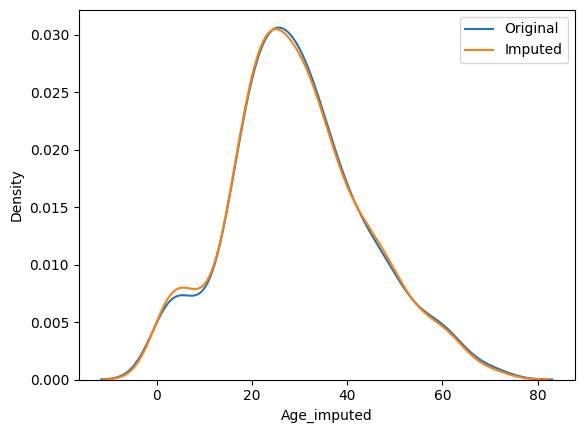

In [71]:
sns.distplot(X_train['Age'],label='Original',hist=False)
sns.distplot(X_train['Age_imputed'],label = 'Imputed',hist=False)

plt.legend()
plt.show()

In [72]:
print('Original variable variance: ', X_train['Age'].var())
print('Variance after random imputation: ', X_train['Age_imputed'].var())


Original variable variance:  204.34951339046142
Variance after random imputation:  203.66657164620176


In [73]:
X_train[['Fare', 'Age', 'Age_imputed']].cov()

,Fare,Age,Age_imputed
Fare,2368.246832,71.512440,48.073583
Age,71.512440,204.349513,204.349513
Age_imputed,48.073583,204.349513,203.666572


<AxesSubplot: >

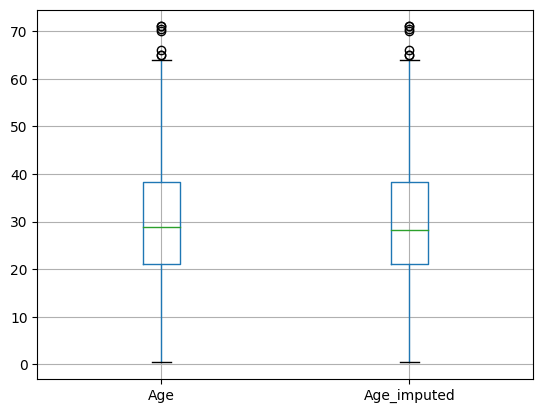

In [74]:
X_train[['Age', 'Age_imputed']].boxplot()

In [75]:
X_train.columns

Index(['Age', 'Fare', 'Age_imputed'], dtype='object')

In [76]:
# two sample input having different output so we have make ramdomness state for  given input
#sampled_value = X_train['Age'].dropna().sample(1, random_state=int(observation['Fare']))


In [77]:
data = pd.read_csv('house_train.csv',usecols=['GarageQual','FireplaceQu', 'SalePrice'])

In [78]:
data.isnull().mean() * 100

FireplaceQu    47.260274
GarageQual      5.547945
SalePrice       0.000000
dtype: float64

In [79]:
X = data
y = data['SalePrice']

In [80]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [81]:
X_train['GarageQual_imputed'] = X_train['GarageQual']
X_test['GarageQual_imputed'] = X_test['GarageQual']

X_train['FireplaceQu_imputed'] = X_train['FireplaceQu']
X_test['FireplaceQu_imputed'] = X_test['FireplaceQu']


In [82]:
X_train.sample(5)


,FireplaceQu,GarageQual,SalePrice,GarageQual_imputed,FireplaceQu_imputed
247,TA,TA,140000,TA,TA
833,NaN,TA,167000,TA,NaN
517,TA,TA,265000,TA,TA
1203,TA,TA,213000,TA,TA
213,NaN,TA,156000,TA,NaN


In [83]:
X_train['GarageQual_imputed'][X_train['GarageQual_imputed'].isnull()] = X_train['GarageQual'].dropna().sample(X_train['GarageQual'].isnull().sum()).values
X_test['GarageQual_imputed'][X_test['GarageQual_imputed'].isnull()] = X_train['GarageQual'].dropna().sample(X_test['GarageQual'].isnull().sum()).values

X_train['FireplaceQu_imputed'][X_train['FireplaceQu_imputed'].isnull()] = X_train['FireplaceQu'].dropna().sample(X_train['FireplaceQu'].isnull().sum()).values
X_test['FireplaceQu_imputed'][X_test['FireplaceQu_imputed'].isnull()] = X_train['FireplaceQu'].dropna().sample(X_test['FireplaceQu'].isnull().sum()).values


In [84]:
temp = pd.concat(
        [
            X_train['GarageQual'].value_counts() / len(X_train['GarageQual'].dropna()),
            X_train['GarageQual_imputed'].value_counts() / len(X_train)
        ],
        axis=1)

temp.columns = ['original', 'imputed']


In [85]:

temp


,original,imputed
TA,0.951043,0.950342
Fa,0.037171,0.036815
Gd,0.009973,0.011130
Po,0.000907,0.000856
Ex,0.000907,0.000856


In [86]:
temp = pd.concat(
        [
            X_train['FireplaceQu'].value_counts() / len(X_train['FireplaceQu'].dropna()),
            X_train['FireplaceQu_imputed'].value_counts() / len(df)
        ],
        axis=1)

temp.columns = ['original', 'imputed']

temp


,original,imputed
Gd,0.494272,0.649832
TA,0.412439,0.539843
Fa,0.040917,0.052750
Po,0.027823,0.037037
Ex,0.024550,0.031425


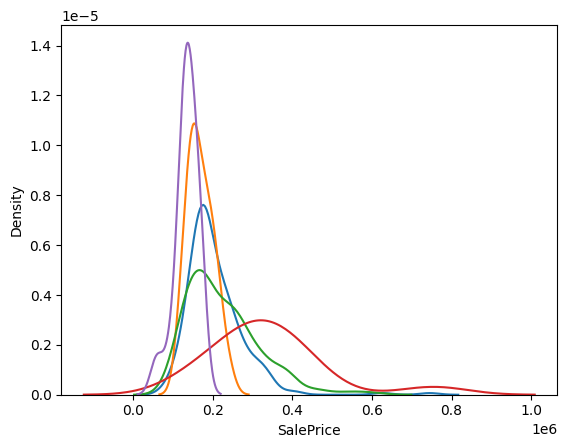

In [87]:
for category in X_train['FireplaceQu'].dropna().unique():
    sns.distplot(X_train[X_train['FireplaceQu'] == category]['SalePrice'],hist=False,label=category)
plt.show()


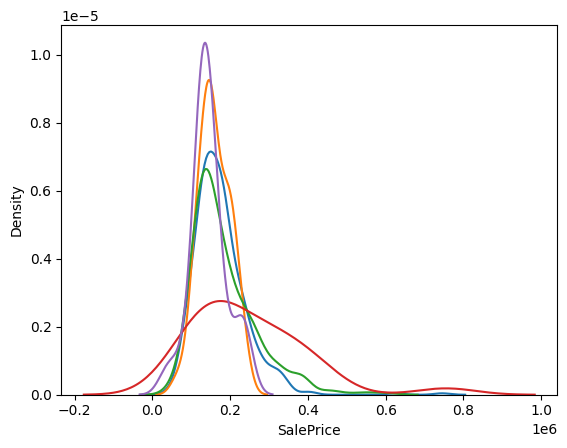

In [88]:

for category in X_train['FireplaceQu_imputed'].dropna().unique():
    sns.distplot(X_train[X_train['FireplaceQu_imputed'] == category]['SalePrice'],hist=False,label=category)
plt.show()